<a href="https://colab.research.google.com/github/MariaPetrovskaya/Natural-Language-Processing-technologies-overview/blob/main/Word2vec/Word2Vec%20in%20NLP%20Samsung%20Russia%20Open%20Education/Word2Vec_in_NLP_Samsung_Russia_Open_Education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vec

Англоязычный датасет, содержащий рецепты, без разметки

##Теоретические заметки

Про модель  word2vec. Она была предложена Томашем Миколавом в 2013 году[1] и привела к настоящему взрыву интереса к дистрибутивной семантике. В основе подхода — моделирование условного распределения вероятностей соседних слов. Важная особенность и отличие от предыдущей модели — в том что, word2vec работает с локальным контекстом, то есть с окном небольшой длины. Например если ширина равна трём, то мы будем идти по тексту и поочереди выбирать вот такие окна, то есть мы поочереди будем каждое слово ставить в центр окна, и рассматривать его контекст. А также, на каждом шаге, для каждого окна, мы обновляем параметры модели, чтобы повысить правдоподобие того, что мы сейчас наблюдаем. Томаш предложил два варианта модели. Первый называется Skip Gram — он моделирует распределение соседей при условии центрального слова. Второй вариант (CBOW)— наоборот, моделирует распределение центрального слова при условии известных соседей. В модели для каждого слова хранятся и настраиваются два вектора. Первый (мы будем называть его центральным) мы будем использовать, когда слово находится в центре окна. Второй — когда слово является контекстом, то есть — не в центре. Параметры этой модели настраиваются градиентным спуском. По сути, процесс обучения word2vec идентичен обучению обычной нейросети, когда подаются обучающие примеры (в данном случае окна) один за другим, и после наблюдений небольшой пачки примеров веса модели обновляются.

[1] Mikolov T. et al. Efficient estimation of word representations in vector space //arXiv preprint arXiv:1301.3781. – 2013. (https://arxiv.org/abs/1301.3781)

Давайте немного подробнее остановимся на варианте Skip Gram. Мы моделируем соседние слова в окне при условии известного центрального слова. В отличие от предыдущей модели, вот эта суммы идёт не по всем уникальным словам, а по всем возможным окнам в корпусе, то есть по всем словоупотреблениям — каждое словоупотребление становится центром окна, мы берём контекст в этом окне, оцениваем его правдоподобие и обновляем веса. Чтобы было удобнее работать с таким распределением, мы предполагаем, что соседние слова условно независимы друг от друга, когда мы уже пронаблюдали центральное слово. Тогда наше распределение факторизуется, то есть его можно представить в виде произведения более простых распределений. Дальше мы моделируем такие распределения по-отдельности, независимо друг от друга. Моделируем мы их с помощью старого доброго друга — софтмакса. Внутри софтмакса мы используем скалярное произведение вектора текущего центрального слова с векторами остальных слов. Всё вроде бы хорошо, но в знаменателе у нас стоит сумма по всему словарю, а градиентные шаги нам нужно делать для каждого окна. Это очень дорого с вычислительной точки зрения. Томаш не растерялся и предложил аппроксимировать честный софтмакс более дешёвыми вариантами — один такой способ называется "отрицательным сэмплированием" (или "negative sampling"). Идея в том, что сумму в знаменателе мы считаем не по всему словарю, а по небольшому числу случайно выбранных слов. Эти слова мы выбираем каждый раз заново. Проблема снижения вычислительной сложности софтмакса является очень насущной, поэтому были предложены и другие варианты — например, иерархический софтмакс[1]. Но, пока что, мы не будем их рассматривать.

[1] Hierarchical softmax and negative sampling: short notes worth telling

https://arxiv.org/ftp/arxiv/papers/1206/1206.6426.pdf

Спустя несколько лет модель word2vec получила вполне естественное развитие. Важной особенностью естественных языков является то, что слова могут принимать различные формы, при этом не меняя смысла. Ну, а мы же хотим чтобы наши вектора описывали именно смысл. Другими, словами мы хотим получить инвариантность к словоизменению. Один способ получить такую инвариантность — это нормализовать текст перед обучением модели — например, с помощью стэмминга или лемматизации. Однако первое ненадёжно, а второе сложно — не для всех языков есть хорошие морфологические анализаторы и лемматизаторы. На сайте "rusvectores.org" выложено много обученных моделей для русского языка, а также на этом сайте можно поисследовать возможности этих моделей в интерактивном режиме. Например, поискать слова, наиболее похожие на слово-запрос. Cреди похожих слов для запроса "язык", нет ничего связанного с биологией, только лингвистические термины. Это связано с тем, что word2vec для каждого слова хранит только один вектор, и это может привести к тому, что некоторые смыслы слова потеряются, а вектор будет описывать только наиболее частотный смысл. А ещё можно выбрать несколько слов и посмотреть графически, как они соотносятся друг с другом. Например, видно, что слово "молоток" ближе к глаголу "забивать", чем к глаголу "любить", например. А глагол "пить" находится недалеко от объектов действия "чай", "кофе". Другое свойство заключается в том, что мы можем складывать и вычитать вектора слов, при этом, как бы, переходя по семантическим связям. Например, если мы вычтем из вектора для снова "женщина" вектор для слова "мужчина", а потом прибавим вектор для слова "дядя" и попробуем поискать ближайшие вектора к полученному, то найдем слова "тётя". Это работает не для всех отношений не для всех слов, но для некоторых частотных — работает.



---



In [ ]:
! pip install gensim #этот импорт надо делать первым, иначе библиотеки степика с ним как-то конфликтуют

In [ ]:
# import modules & set up logging
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
import multiprocessing

from gensim.models import Word2Vec

In [ ]:
from gensim import models

In [ ]:
from gensim.utils import keep_vocab_item, call_on_class_only, deprecated
from gensim.models.keyedvectors import KeyedVectors, pseudorandom_weak_vector
from gensim import utils, matutils

# This import is required by pickle to load models stored by Gensim < 4.0, such as Gensim 3.8.3.
from gensim.models.keyedvectors import Vocab  # noqa

In [ ]:
# Если Вы запускаете ноутбук на colab или kaggle,
# выполните следующие строчки, чтобы подгрузить библиотеку dlnlputils:

!git clone https://github.com/Samsung-IT-Academy/stepik-dl-nlp.git && pip install -r stepik-dl-nlp/requirements.txt
import sys; sys.path.append('./stepik-dl-nlp')

Cloning into 'stepik-dl-nlp'...
remote: Enumerating objects: 296, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 296 (delta 0), reused 0 (delta 0), pack-reused 293
Receiving objects: 100% (296/296), 42.30 MiB | 14.29 MiB/s, done.
Resolving deltas: 100% (134/134), done.
Updating files: 100% (51/51), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 32.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.8/936.8 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 42.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylin

In [ ]:
%load_ext autoreload
%autoreload 2

import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch import nn
from torch.nn import functional as F

import dlnlputils
from dlnlputils.data import tokenize_corpus, build_vocabulary, texts_to_token_ids, \
    PaddedSequenceDataset, Embeddings
from dlnlputils.pipeline import train_eval_loop, predict_with_model, init_random_seed
from dlnlputils.visualization import plot_vectors

init_random_seed()

## Загрузка данных и подготовка корпуса

In [ ]:
# Если Вы запускаете ноутбук на colab или kaggle, добавьте в начало пути ./stepik-dl-nlp
full_dataset = list(pd.read_csv('./stepik-dl-nlp/datasets/nyt-ingredients-snapshot-2015.csv')['input'].dropna())
random.shuffle(full_dataset)

TRAIN_VAL_SPLIT = int(len(full_dataset) * 0.7)
train_source = full_dataset[:TRAIN_VAL_SPLIT]
test_source = full_dataset[TRAIN_VAL_SPLIT:]
print("Обучающая выборка", len(train_source))
print("Тестовая выборка", len(test_source))
print()
print('\n'.join(train_source[:10]))

Обучающая выборка 125344
Тестовая выборка 53719

1/4 cup sour cream
10 ounces swordfish, red snapper or other firm-fleshed fish
1 tablespoon minced basil leaves
Handful fresh parsley, finely minced
4 ounces lard or butter, plus more for brushing tops
4 to 5 green cardamom pods
1 stick ( 1/4 pound) unsalted butter, softened
1/4 teaspoon red pepper flakes, preferably Turkish or Aleppo (see note), more to taste
1 tablespoon fresh lemon juice
1/4 cup scallions, thinly sliced


In [ ]:
# токенизируем
train_tokenized = tokenize_corpus(train_source)
test_tokenized = tokenize_corpus(test_source)
print('\n'.join(' '.join(sent) for sent in train_tokenized[:10]))

sour cream
ounces swordfish snapper other firm fleshed fish
tablespoon minced basil leaves
handful fresh parsley finely minced
ounces lard butter plus more brushing tops
green cardamom pods
stick pound unsalted butter softened
teaspoon pepper flakes preferably turkish aleppo note more taste
tablespoon fresh lemon juice
scallions thinly sliced


In [ ]:
# строим словарь
vocabulary, word_doc_freq = build_vocabulary(train_tokenized, max_doc_freq=0.9, min_count=5, pad_word='<PAD>')
print("Размер словаря", len(vocabulary))
print(list(vocabulary.items())[:10])

Размер словаря 2267
[('<PAD>', 0), ('tablespoons', 1), ('teaspoon', 2), ('chopped', 3), ('salt', 4), ('pepper', 5), ('cups', 6), ('ground', 7), ('fresh', 8), ('tablespoon', 9)]


In [ ]:
# отображаем в номера токенов
train_token_ids = texts_to_token_ids(train_tokenized, vocabulary)
test_token_ids = texts_to_token_ids(test_tokenized, vocabulary)

print('\n'.join(' '.join(str(t) for t in sent)
                for sent in train_token_ids[:10]))

222 52
22 878 574 127 246 707 181
9 19 88 33
517 8 43 15 19
22 586 20 45 47 649 648
59 329 535
200 12 50 20 266
2 5 140 78 1208 735 153 47 10
9 8 31 25
98 65 27


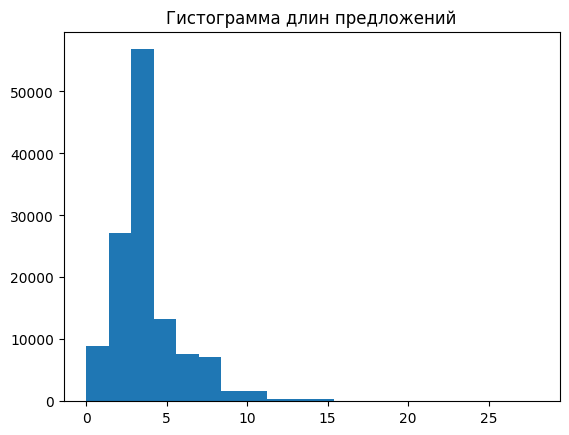

In [ ]:
plt.hist([len(s) for s in train_token_ids], bins=20);
plt.title('Гистограмма длин предложений');

In [ ]:
MAX_SENTENCE_LEN = 20
train_dataset = PaddedSequenceDataset(train_token_ids,
                                      np.zeros(len(train_token_ids)),
                                      out_len=MAX_SENTENCE_LEN)
test_dataset = PaddedSequenceDataset(test_token_ids,
                                     np.zeros(len(test_token_ids)),
                                     out_len=MAX_SENTENCE_LEN)
print(train_dataset[0])

(tensor([222,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0]), tensor(0))


Сегодня мы реализуем своими собственными руками и обучим одну из самых простых и популярных моделей дистрибутивной семантики word2vec! Реализовывать модель будем с помощью pytorch. Итак, сначала нам нужно импортировать библиотеки, которые мы будем использовать, к ним относится numpy, matplotlib для визуализации, pytorch, а также наша небольшая библиотечка, которую мы написали специально для этого курса. Самый первый шаг — это загрузить датасет. В этом семинаре мы будем работать с англоязычным датасетом, составленным из рецептов. Нам нужны и из него только сами тексты — разметка нам не нужна. В этой ячейке мы также выполняем разбиение всего датасета на обучающую часть и на валидационную часть. Для этого мы сначала перемешиваем все предложения, а затем просто берём первые семьдесят процентов как обучение, и остальные тридцать как валидацию. Итого: у нас получается чуть больше 120 тысяч предложений для обучения — достаточно неплохо. Здесь вы можете видеть примеры предложений: первые 10 предложений. Следующий шаг после загрузки датасета — это токенизация, то есть разбиение на базовые лексические элементы. Токенизацию мы выполняем с помощью регулярных выражений. Мы уже использовали этот же алгоритм токенизации в первом семинаре про логистическую регрессию и классификацию новостных текстов. На экране вы видите те же самые 10 предложений, только после токенизации. В результате токенизации мы отбрасываем все очень короткие токены — предположительно, они не несут основного смысла. Далее, используя только обучающую подвыборку, мы строим словарь. При построении словаря мы хотим учитывать только значимые слова. Для этого мы отбрасываем слишком редкие слова, для которых мы просто не можем накопить статистику и не можем выучить их смысл — если слово встречается только один-два раза в корпусе, мы всё равно не сможем для него выучить какой-то "вектор смысла". А также мы отбрасываем самые часто встречающиеся токены — предположительно, это союзы, знаки препинания, цифры... Важный момент, про который нужно упомянуть — это добавление фиктивного токена в словарь: "токена выравнивания", так называемого. Он получает номер "ноль" и он будет использоваться для того, чтобы у нас появилась возможность объединить предложения разной длины в прямоугольный тензор. Это — часто применяемый трюк при обработке текстов с помощью нейросетей. Как мы видим, всего в нашем датасете примерно две тысячи уникальных токенов. Нейросети и компьютеры не умеют работать с текстами, как это делает человек — они работают только с числами. Нам нужно применить наш построенный словарь для того, чтобы отобразить токены (как фрагменты текста) в числа (в номера этих токенов в словаре). На экране вы видите те же самые 10 предложений, но вместо токенов здесь — их номера. Давайте посмотрим, какой длины предложения в нашем датасете встречаются. Видим, что большая часть предложений укладывается в 20 токенов. И, наконец, мы создаём специальные объекты — "датасеты" (Dataset). Они будут использоваться для того, чтобы, непосредственно, подавать данные — подавать фрагменты обучающей выборки в модель в процессе обучения. Мы хотим использовать pytorch и обучать модель, возможно, на видеокарте (особенно, если наша модель большая), а значит, нам нужно предусмотреть всё для эффективной пакетной обработки. Модель должна уметь обрабатывать сразу много предложений разной длины — "за раз". Но, с другой стороны, модели могут работать только с тензорами, а тензор — это такая "прямоугольная" конструкция, она не может иметь "неровный край". Нам нужно сделать, так чтобы все предложения имели одинаковую длину. Самое простое — это выровнять длину этих предложений с помощью фиктивных слов. Именно для этого мы вводили в словарь слово "" с нулевым идентификатором. Для того, чтобы подготавливать данные в нужном нам видео, мы используем объект PaddedSequenceDataset. Этот объект описан в нашей маленькой библиотеке, которую мы сделали специально для этого курса. Он умеет делать только две простые вещи: во-первых он может говорить свою длину (то есть, сколько предложений в нём есть, сколько текстов), а также он умеет возвращать предложение по номеру. При этом, если предложение короче некоторой заданной длины, то он добавляет нули в конец этого предложения. Или же, наоборот, если предложение длиннее установленного порога, то он его обрезает, то есть берёт только префикс предложения. Эта функция возвращает пары — а именно "текст" и "какая-то метка", которую по этому тексту нужно предсказывать. В данном семинаре мы не будем использовать метки — чуть позже я объясню, почему. Тем не менее, для того, чтобы этот объект можно было использовать в разных задачах (например, в задачах классификации), мы возвращаем и метки тоже. На экране вы видите один обучающий пример — так, как его подготовил наш Dataset. Мы видим, что это предложение состоит только из двух значимых токенов. Все остальные позиции заполняются нулями. С помощью гистограммы, которую мы построили чуть раньше, мы имели возможность выбрать оптимальную длину предложения так, чтобы и лишних вычислений не делать слишком много, и, при этом, уметь обрабатывать практически все предложения из нашего датасета. Для нашего датасета, как мне кажется, неплохо подходит порог "20". Я скажу ещё пару слов о том, зачем нам нужны эти паддинги (добавлять нули, и так далее). Видеокарты (это основные вычислители, которые сейчас используются для обучения нейросетей) умеют делать хорошо достаточно простые операции, и, при этом, они умеют делать эти простые операции параллельно. Допустим, если нам нужно перемножить две матрицы, то в видеокарте запускается четыре тысячи потоков, каждый поток из этих четырёх тысяч, по сути, делает только 1-2 перемножения, и всё — и возвращает результат. При этом мы получаем очень большое ускорение. Но проблема в том, что данные исходные у нас не лежат на видеокарте, они лежат у нас во внешней памяти на жёстком диске. Сначала мы их загружаем с жёсткого диска в оперативную память, как-то предобрабатываем (например — так, как мы это сейчас обсудили), и только потом копируем в память видеокарты. Эта процедура копирования занимает значительное время. Это гораздо дороже, чем скопировать память внутри видеокарты или внутри оперативной памяти. И поэтому мы хотим минимизировать количество переносов данных из оперативной памяти в память видеокарты, и наоборот. Для этого нам нужно объединять наши обучающие примеры в батчи (в группы), и мы описываем нашу модель, наш процесс обучения, таким образом, чтобы он поддерживал обработку нескольких обучающих примеров за раз. Естественно, чем больше данных за раз мы загрузили в видеокарту, тем более эффективно мы можем использовать возможности параллельных вычислений. Все потоки будут хорошо загружены.

## Алгоритм обучения - Skip Gram Negative Sampling

**Skip Gram** - предсказываем соседние слова по центральному слову

**Negative Sampling** - аппроксимация softmax

$$ W, D \in \mathbb{R}^{Vocab \times EmbSize} $$

$$ \sum_{CenterW_i} P(CtxW_{-2}, CtxW_{-1}, CtxW_{+1}, CtxW_{+2} | CenterW_i; W, D) \rightarrow \max_{W,D} $$

$$ P(CtxW_{-2}, CtxW_{-1}, CtxW_{+1}, CtxW_{+2} | CenterW_i; W, D) = \prod_j P(CtxW_j | CenterW_i; W, D) $$
    
$$ P(CtxW_j | CenterW_i; W, D) = \frac{e^{w_i \cdot d_j}} { \sum_{j=1}^{|V|} e^{w_i \cdot d_j}} = softmax \simeq \frac{e^{w_i \cdot d_j^+}} { \sum_{j=1}^{k} e^{w_i \cdot d_j^-}}, \quad k \ll |V| $$

 Давайте перейдём к программированию нашей модели и процессу её обучения. Сначала определим вспомогательную функцию, которая нам будет полезна. Наша модель принимает на вход целое предложение и должна оценивать вероятности встречаемости двух слов внутри небольшого окна. Другими словами, нам нужно игнорировать факты совместной встречаемости слов в одном предложении, но — далеко друг от друга, за пределами окна. Для того, чтобы игнорировать такие случаи, введём функцию, которая создаёт маску. В данном случае, маска — это квадратная матрица, сторона матрицы равна длине предложения, с которым мы работаем, все элементы в этой матрице — нулевые, за исключением двух полосок вдоль главной диагонали. Эти полоски заполнены единичками, и ширина этих полосок равна половине ширины окна. Таким образом мы задаём множество пар позиций токенов в предложении, для которых мы учитываем факты совместной встречаемости. Другими словами, строки и столбцы этой матрицы соответствуют некоторым позициям токенов в предложении, и значение этой матрицы задаёт — учитываем ли мы тот факт, что два токена, стоящие на этих позициях, встречается в одном предложении — учитываем ли мы этот факт как положительный пример при обучении, или игнорируем этот факт. Например, для позиций 10 и 2 мы игнорируем, потому что эти две позиции стоят далеко. А если позиции отличаются всего лишь на единичку — например 3 и 2, то мы уже учитываем, потому что тогда эти 2 токена всегда входят в наше окно. Эта матрица нам потребуется чуть позже для того, чтобы реализовать эффективную пакетную обработку на видеокарте.

In [ ]:
def make_diag_mask(size, radius):
    """Квадратная матрица размера Size x Size с двумя полосами ширины radius вдоль главной диагонали"""
    idxs = torch.arange(size)
    abs_idx_diff = (idxs.unsqueeze(0) - idxs.unsqueeze(1)).abs()
    mask = ((abs_idx_diff <= radius) & (abs_idx_diff > 0)).float()
    return mask

make_diag_mask(10, 3)

tensor([[0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 0., 0.],
        [0., 1., 1., 1., 0., 1., 1., 1., 0., 0.],
        [0., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [0., 0., 0., 1., 1., 1., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1., 1., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1., 1., 1., 0.]])

**Negative Sampling** работает следующим образом - мы **максимизируем сумму вероятностей двух событий**:

* "этот пример центрального слова вместе с контекстными словами взят **из тренировочной выборки**": $$ P(y=1 | CenterW_i; CtxW_j) = sigmoid(w_i \cdot d_j) = \frac{1}{1+e^{-w_i \cdot d_j}} $$

$$ \\ $$

* "этот пример центрального слова вместе со случайми контекстными словами **выдуман** ": $$ P(y=0 | CenterW_i; CtxW_{noise}) = 1 - P(y=1 | CenterW_i;  CtxW_{noise}) = \frac{1}{1+e^{w_i \cdot d_{noise}}} $$

$$ \\ $$

$$ NEG(CtxW_j, CenterW_i) = log(\frac{1}{1+e^{-w_i \cdot d_j}}) + \sum_{l=1}^{k}log(\frac{1}{1+e^{w_i \cdot d_{noise_l}}})  \rightarrow \max_{W,D} $$

In [ ]:
class SkipGramNegativeSamplingTrainer(nn.Module):
    def __init__(self, vocab_size, emb_size, sentence_len, radius=5, negative_samples_n=5):
        super().__init__()
        self.vocab_size = vocab_size
        self.negative_samples_n = negative_samples_n

        self.center_emb = nn.Embedding(self.vocab_size, emb_size, padding_idx=0)
        self.center_emb.weight.data.uniform_(-1.0 / emb_size, 1.0 / emb_size)
        self.center_emb.weight.data[0] = 0

        self.context_emb = nn.Embedding(self.vocab_size, emb_size, padding_idx=0)
        self.context_emb.weight.data.uniform_(-1.0 / emb_size, 1.0 / emb_size)
        self.context_emb.weight.data[0] = 0

        self.positive_sim_mask = make_diag_mask(sentence_len, radius)

    def forward(self, sentences):
        """sentences - Batch x MaxSentLength - идентификаторы токенов"""
        batch_size = sentences.shape[0]
        center_embeddings = self.center_emb(sentences)  # Batch x MaxSentLength x EmbSize

        # оценить сходство с настоящими соседними словами
        positive_context_embs = self.context_emb(sentences).permute(0, 2, 1)  # Batch x EmbSize x MaxSentLength
        positive_sims = torch.bmm(center_embeddings, positive_context_embs)  # Batch x MaxSentLength x MaxSentLength
        positive_probs = torch.sigmoid(positive_sims)

        # увеличить оценку вероятности встретить эти пары слов вместе
        positive_mask = self.positive_sim_mask.to(positive_sims.device)
        positive_loss = F.binary_cross_entropy(positive_probs * positive_mask,
                                               positive_mask.expand_as(positive_probs))

        # выбрать случайные "отрицательные" слова
        negative_words = torch.randint(1, self.vocab_size,
                                       size=(batch_size, self.negative_samples_n),
                                       device=sentences.device)  # Batch x NegSamplesN
        negative_context_embs = self.context_emb(negative_words).permute(0, 2, 1)  # Batch x EmbSize x NegSamplesN
        negative_sims = torch.bmm(center_embeddings, negative_context_embs)  # Batch x MaxSentLength x NegSamplesN

        # уменьшить оценку вероятность встретить эти пары слов вместе
        negative_loss = F.binary_cross_entropy_with_logits(negative_sims,
                                                           negative_sims.new_zeros(negative_sims.shape))

        return positive_loss + negative_loss


def no_loss(pred, target):
    """Фиктивная функция потерь - когда модель сама считает функцию потерь"""
    return pred

Итак, начнём описывать нашу модель. Как вы помните, в модели есть две прямоугольные матрицы размерности "количество слов в словаре" на "размер эмбеддинга". В pytorch есть модуль, который реализует функции выборки из этой таблицы по номеру токена — этот модуль называется embedding, и он лежит в пакете nn. Мы создаём два экземпляра этого класса для того, чтобы хранить таблицу центральных векторов и контекстных векторов. Очень важный момент, который не всегда описывается в руководствах и статьях про обучение эмбеддингов: очень важно проинициализировать эти таблицы. По умолчанию, nn.embedding заполняет значения в своей матрице нормальным шумом. Для обучения word2vec эта инициализация совершенно не подходит. Правильный способ инициализации весов для обучения word2vec — это равномерный шум, причём диапазон значений этого шума связан с размерностью эмбеддингов. Такая инициализация нужна для того, чтобы длина вектора, начальная, примерно равнялась единице. Также, как мы помним, у нас есть фиктивное слово — фиктивный токен "pad". Мы его используем для того, чтобы дополнять предложения до фиксированной длины. Мы говорим слою nn embedding, что токен с индексом "0" — фиктивный и что для него не нужно учить вектор, для него вектор всегда будет нулевым. Он не будет меняться в процессе обучения. Проделываем всё то же самое для матрицы контекстных векторов. И создаём, один раз, матрицу масок с двумя полосками ненулевых элементов — как мы чуть раньше сказали. Это — то, что касается инициализации.

Перейдём к прямому проходу по этой модели. Традиционно, метод forward используется для того, чтобы получить предсказание модели для какого-то обучающего примера — например, получить метку класса. Но у нас здесь не вполне обычная модель, мы здесь используем метод forward для того, чтобы вычислить функцию потерь. Таким образом, наш класс модели, который мы сейчас описываем, на самом деле — это не модель, это алгоритм обучения, и мы назвали этот класс соответствующим образом — "trainer". Итак, на вход на каждой итерации нам дают пачку предложений — прямоугольный тензор размерности ["размер батча" на "максимальную длину предложения"]. Этот тензор имеет целочисленный тип. На первом шаге, для каждого токена из батча, мы получаем центральный эмбеддинг, то есть делаем выборку из таблицы центральных эмбеддингов. В результате мы получаем тензор вот такой размерности (трёхмерный тензор): ["размер батча" на "максимально длину предложения", и здесь у нас добавляется ещё "размер эмбеддинга"] в конец. Как вы помните, процесс обучения word2vec — это процесс обучения классификатора, который предсказывает — могут ли два слова встретиться в рамках какого-то небольшого окна, или не могут. Соответственно, нам нужны как положительные примеры, так и отрицательные примеры. Сначала разберёмся с положительными примерами. Для этого мы берём всё те же токены — все токены, которые у нас есть в батче, и делаем для них выборку из таблицы контекстных токенов. То есть, если сначала мы делали выборку из таблицы центральных токенов, теперь мы делаем выборку из таблицы контекстных токенов. И сразу же транспонируем её — то есть на этом шаге мы получаем тензор размерности ["батч" на "размер эмбеддинга" на "максимальную длину предложения"]. А затем мы вызываем функцию "torch.bmm", которая делает матричное произведение для каждой пары матриц в батче, то есть она принимает на вход два батча матриц прямоугольных, и выполняет матричное произведение для каждой пары. В результате мы получаем трёхмерный тензор размерности ["количество примеров в батче" на "максимальную длину предложения" на "максимальную длину предложения"]. Физический смысл этого тензора — это оценка сходства, оценка семантической близости, для каждой пары токенов, встретившихся внутри предложения. Далее мы преобразовываем оценки сходства в вероятности с помощью сигмоиды. Переменная positive props содержит оценки вероятностей того, что два слова встретятся вместе, и такие оценки вычислены для всех возможных пар слов для каждого предложения из батча. Но надо помнить, что мы хотим учитывать не все совместные встречаемости, а только совместные встречаемости внутри небольшого окна. Здесь-то нам и приходит на помощь матрица маски, которую мы построили чуть раньше. Так как мы решаем задачу классификации, то мы используем соответствующую функцию потерь — в данном случае бинарную кросс-энтропию, и здесь — важный момент — мы домножаем тензор вероятностей, который содержит вероятность для всех возможных пар токенов из наших предложений, на маску. Таким образом мы зануляем оценки вероятностей для всех пар токенов, которые не лежат внутри окна. И далее мы говорим, что настоящая метка для этих позиций — это единичка. То есть, для этих пар слов и этих позиций, модель должна предсказывать большую вероятность совместной встречаемости. Итак, с положительными примерами разобрались, давайте перейдём к отрицательным. В названии алгоритма есть слова "negative sampling", то есть сэмплирование отрицательных слов. Это достаточно буквальное название, то есть в качестве отрицательных слов мы выбираем случайные слова. В данном примере мы выбираем слова равномерно. В более продвинутых реализациях в качестве отрицательных слов используются более редкие слова, то есть сэмплирование уже идёт не равномерно, а с учётом частоты встречаемости каждого слова в обучающей выборке. Но, для простоты, мы опустим эти детали здесь. Итак, мы используем метод "torch.randint", который возвращает случайные целые числа в заданном диапазоне, для того, чтобы получить номера токенов, которые мы будем использовать в качестве отрицательных. Далее мы делаем выборку из таблицы контекстных векторов для полученных отрицательных токенов и сразу же её транспонируем. Таким образом, мы получаем трёхмерный тензор размерности ["количество предложений в батче" на "размер эмбеддинга" и на "количество отрицательных слов"], которые мы сэмплируем для каждого обучающего примера. Далее мы оцениваем семантическое сходство слов из настоящих предложений и случайно выбранных отрицательных слов. Делаем это так же — скалярным произведением. Далее мы также используем кросс-энтропию, для того чтобы сходство настоящих слов и отрицательных слов было поменьше, то есть мы передаём нули как таргеты. Кстати, здесь я использую функцию binary cross entropy with logits, она на вход принимает не оценки вероятностей, а оценки сходства, то есть не нормализованные значения. По сути, вот эти два способа использовать кросс-энтропию — они примерно одинаковы, но второй способ более стабильный с численной точки зрения. Ну и, наконец, мы просто возвращаем сумму функции потерь для положительных примеров и для отрицательных.

## Обучение

In [ ]:
trainer = SkipGramNegativeSamplingTrainer(len(vocabulary), 100, MAX_SENTENCE_LEN,
                                          radius=5, negative_samples_n=25)

In [ ]:
best_val_loss, best_model = train_eval_loop(trainer,
                                            train_dataset,
                                            test_dataset,
                                            no_loss,
                                            lr=1e-2,
                                            epoch_n=2,
                                            batch_size=8,
                                            device='cpu',
                                            early_stopping_patience=10,
                                            max_batches_per_epoch_train=2000,
                                            max_batches_per_epoch_val=len(test_dataset),
                                            lr_scheduler_ctor=lambda optim: torch.optim.lr_scheduler.ReduceLROnPlateau(optim, patience=1, verbose=True))

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Эпоха 0
Эпоха: 2001 итераций, 22.01 сек
Среднее значение функции потерь на обучении 0.8888508414459609
Среднее значение функции потерь на валидации 0.8810310923689262
Новая лучшая модель!

Эпоха 1
Эпоха: 2001 итераций, 14.75 сек
Среднее значение функции потерь на обучении 0.8782664205895728
Среднее значение функции потерь на валидации 0.877391709725713
Новая лучшая модель!



Давайте уже наконец перейдём к самому обучению. Сначала мы создаём экземпляр класса trainer, то есть — того класса, который мы сейчас описывали, и передаём туда размер нашего словаря, размер эмбеддингов, которые мы строим, максимальную длину предложения, а также описываем ширину окна, в рамках которого нам нужно учитывать совместные встречаемости слов. И для каждого предложения мы будем сэмплировать 25 отрицательных слов. Обучать модель мы будем с помощью функции "train_eval_loop", она реализует стандартный цикл для обучения нейросети, когда мы берём батч примеров из датасета, подаём на вход нейросети, вычисляем функцию ошибки, делаем градиентный шаг, и так далее — повторяем несколько таких эпох. И на каждой эпохе мы делаем проход как по обучающей подвыборке, так и по тестовой. Правда, для этого семинара мы внесли в этот цикл пару изменений — основное изменение заключается в том, что мы будем менять скорость обучения в процессе обучения. Логика такая, что когда, спустя несколько итераций, значение функции потерь перестаёт уменьшаться, мы считаем, что мы достигли некоторого предела, используя градиентные шаги такой длины, и говорим, что дальше будем делать более короткие шаги. Это позволяет нам спускаться в более узкие локальные минимумы, в которое мы бы не могли зайти, используя длинные шаги.

In [ ]:
# Если Вы запускаете ноутбук на colab или kaggle, добавьте в начало пути ./stepik-dl-nlp
torch.save(trainer.state_dict(), './stepik-dl-nlp/models/sgns.pth')

In [ ]:
# Если Вы запускаете ноутбук на colab или kaggle, добавьте в начало пути ./stepik-dl-nlp
trainer.load_state_dict(torch.load('./stepik-dl-nlp/models/sgns.pth'))

<All keys matched successfully>

## Исследуем характеристики полученных векторов

In [ ]:
embeddings = Embeddings(trainer.center_emb.weight.detach().cpu().numpy(), vocabulary)

In [ ]:
embeddings.most_similar('chicken')

[('chicken', 0.99993825),
 ('duck', 0.63360304),
 ('thighs', 0.6003635),
 ('breasts', 0.59453577),
 ('stock', 0.57336885),
 ('broth', 0.5484196),
 ('quarts', 0.5390098),
 ('breast', 0.5274664),
 ('sodium', 0.51676565),
 ('apart', 0.5112716)]

In [ ]:
embeddings.analogy('cake', 'cacao', 'cheese')

[('emmenthal', 1.0599453),
 ('cheeses', 1.0130466),
 ('gorgonzola', 1.007175),
 ('cottage', 0.99478126),
 ('glaze', 0.9930079),
 ('cheese', 0.98398626),
 ('cacao', 0.97802466),
 ('sheep', 0.9763385),
 ('monterey', 0.97383016),
 ('provolone', 0.96693236)]

In [ ]:
test_words = ['salad', 'fish', 'salmon', 'sauvignon', 'beef', 'pork', 'steak', 'beer', 'cake', 'coffee', 'sausage', 'wine', 'merlot', 'zinfandel', 'trout', 'chardonnay', 'champagne', 'cacao']
test_vectors = embeddings.get_vectors(*test_words)
print(test_vectors.shape)

(18, 100)


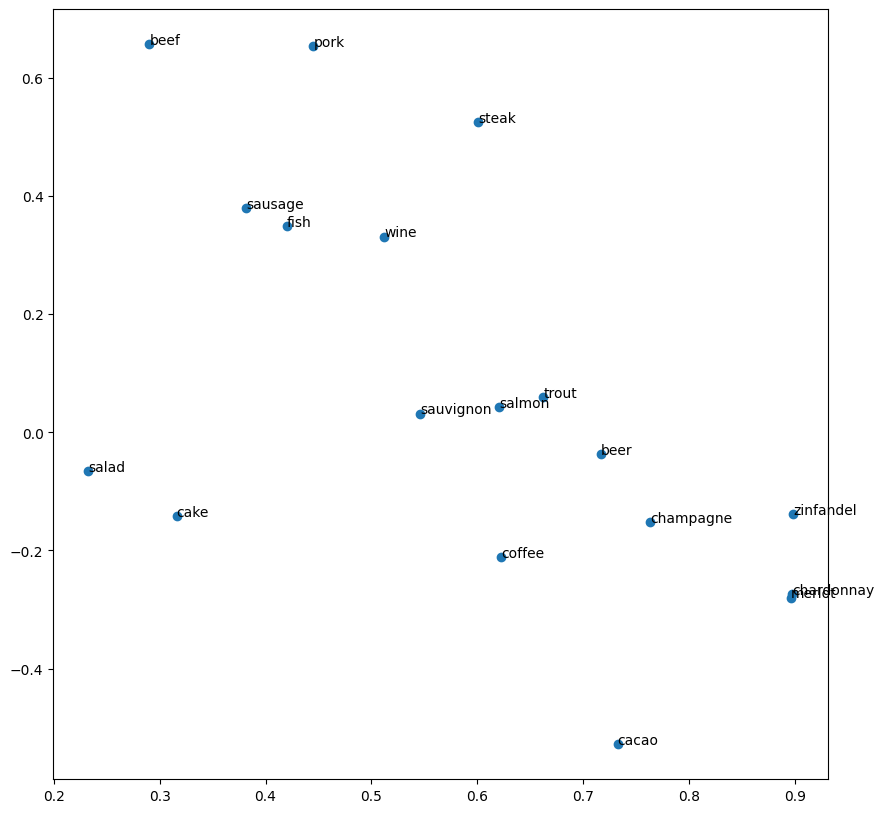

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((10, 10))
plot_vectors(test_vectors, test_words, how='svd', ax=ax)

In [ ]:
# Embeddings

#     def __init__(self, embeddings, word2id):
#         self.embeddings = embeddings
#         self.embeddings /= (np.linalg.norm(self.embeddings, ord=2, axis=-1, keepdims=True) + 1e-4)
#         self.word2id = word2id
#         self.id2word = {i: w for w, i in word2id.items()}

#     def most_similar(self, word, topk=10):
#         return self.most_similar_by_vector(self.get_vector(word), topk=topk)

#     def analogy(self, a1, b1, a2, topk=10):
#         a1_v = self.get_vector(a1)
#         b1_v = self.get_vector(b1)
#         a2_v = self.get_vector(a2)
#         query = b1_v - a1_v + a2_v
#         return self.moclass Embeddings:st_similar_by_vector(query, topk=topk)

#     def most_similar_by_vector(self, query_vector, topk=10):
#         similarities = (self.embeddings * query_vector).sum(-1)
#         best_indices = np.argpartition(-similarities, topk, axis=0)[:topk]
#         result = [(self.id2word[i], similarities[i]) for i in best_indices]
#         result.sort(key=lambda pair: -pair[1])
#         return result

#     def get_vector(self, word):
#         if word not in self.word2id:
#             raise ValueError('Неизвестное слово "{}"'.format(word))
#         return self.embeddings[self.word2id[word]]

#     def get_vectors(self, *words):
#         word_ids = [self.word2id[i] for i in words]
#         vectors = np.stack([self.embeddings[i] for i in word_ids], axis=0)
#         return vectors

dlnlputils.data.embeddings.Embeddings

Прошло немного времени, наша модель обучилась — мы видим, что даже уже за одну эпоху функция потерь достигла приемлемого значения и в последующих итерациях она менялась слабо. Наше дополнение для уменьшения скорости обучения тоже сработало. На всякий случай, сохраним нашу модель. Давайте теперь достанем вектора слов из обученной модели и посмотрим — что же мы там "научили". Для того, чтобы было удобно экспериментировать с обученными эмбеддингами слов, мы сделали небольшой класс, который на вход принимает numpy-массив двумерный — прямоугольную матрицу, количество строк в которой совпадает с количеством слов в словаре, а количество столбцов с размерностью эмбеддинга. А также, этот класс принимает словарь, который отображает токены в текстовом виде в номера токенов. Важный момент — для того, чтобы было удобнее искать похожие слова, мы нормируем вектора — каждый вектор нормируется на его евклидову норму (на его длину). Этот класс поддерживает несколько методов — например, поиск ближайших слов, решение семантической пропорции — то есть задача аналогии, а также получение списка векторов для слов. Все эти функции, так или иначе, завязаны на самое главное — это вычисление близости векторов. Этот алгоритм реализуется в методе most similar by vector. Метод принимает на вход вектор и возвращает список пар. В каждой паре первый элемент — это токен в строковом виде, второй — это оценка сходства с вектором-запросом. Мы здесь сначала находим сходство данного вектора со всеми вообще векторами в нашей таблице, а затем выбираем заданное количество наиболее близких. Итак, давайте поэкспериментируем с полученными эмбеддингами, посмотрим, "что же там научилось". Давайте найдём слова, самые близкие по смыслу, к слову "сыр". Мы видим, что список похожих слов содержит, в первую очередь, сорта сыра — чеддер, пармезан, рикотта, и так далее. В принципе, выглядит неплохо! Давайте ещё какой-нибудь пример посмотрим — например, "курица". Мы видим, что здесь "утка", "индейка", "грудка" и другие виды мяса. Давайте также попробуем решить смысловую пропорцию, то есть найти слова которые относятся к сыру так же, как "какао" относится к "пирожному". Список похожих слов получился не очень осмысленным, это вполне понятно, потому что предложения короткие, и "сыр", допустим, с "вином", редко встречается в одном предложении — хотя бы поэтому. Из такого небольшого корпуса, как наш, мы могли и не выучить нужные закономерности. То есть, размер корпуса очень важен при обучении дистрибутивно-семантических моделей. Давайте теперь получим вектора для сразу нескольких слов и набросаем их на плоскость. Наши вектора имеют размерность "100". Вектора размерности "100" непосредственно нельзя визуализировать — мы можем визуализировать только вектора размерности не больше трёх, но более удобно использовать вообще "2", чтобы всё на плоскости было. У нас в библиотеке есть специально небольшая функция для этого. Что же у нас тут выучилось? На этом графике мы видим, что — допустим, слова, соответствующие сортам винограда ближе к друг другу, чем к другим словам, а также мясные и рыбные изделия тоже объединились в группу. Центральная группа соответствует тоже каким-то напиткам, куда попало и "вино", и "какао", и "кофе". Алгоритм обучения word2vec не детерминированный, потому что мы случайно инициализируем таблицы эмбеддингов, делаем случайные шаги по случайно выбранным группам примеров, мы используем случайное сэмплирование отрицательных слов, и поэтому, если вы несколько раз запустите обучение, то вы получите разные рисунки и немного отличающиеся списки "похожих" слов.



## Обучение Word2Vec с помощью Gensim

In [ ]:
word2vec = gensim.models.Word2Vec(sentences=train_tokenized, vector_size=100,
                                  window=5, min_count=5, workers=4,
                                  sg=1, epochs=10)

In [ ]:
word2vec.wv.most_similar('chicken')

[('duck', 0.7224005460739136),
 ('turkey', 0.68096923828125),
 ('pheasant', 0.6805034875869751),
 ('thighs', 0.6716834902763367),
 ('simmering', 0.670296311378479),
 ('drumsticks', 0.6700149774551392),
 ('defatted', 0.6587092876434326),
 ('breasts', 0.6465543508529663),
 ('legs', 0.6377983093261719),
 ('rabbit', 0.6305736303329468)]

In [ ]:
gensim_words = [w for w in test_words if w in word2vec.wv.index_to_key]
gensim_vectors = np.stack([word2vec.wv[w] for w in gensim_words])

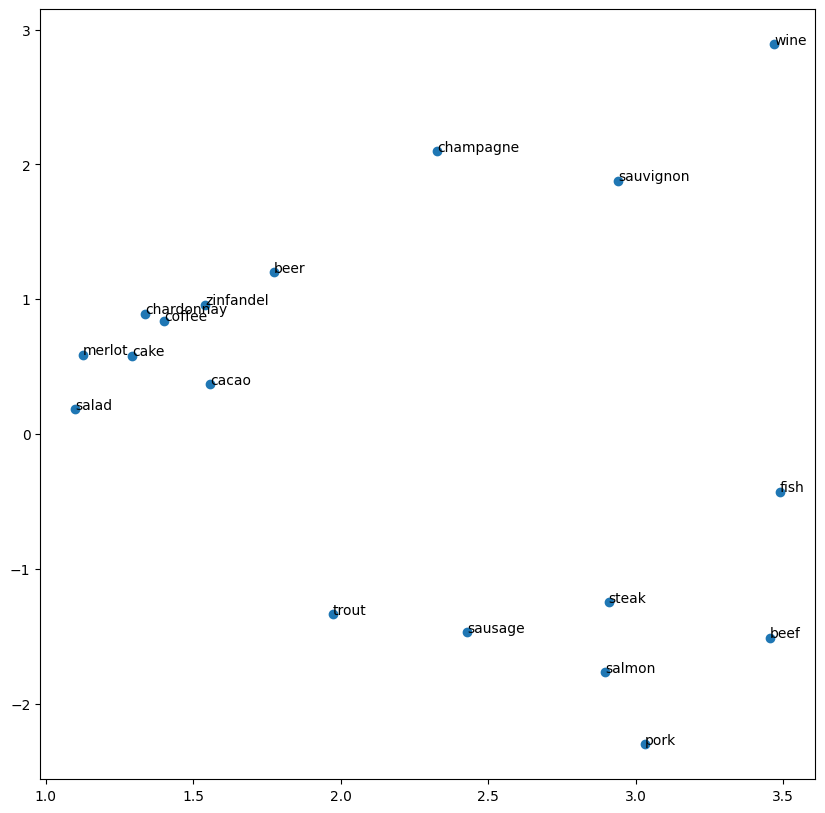

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((10, 10))
plot_vectors(gensim_vectors, test_words, how='svd', ax=ax)

## Загрузка предобученного Word2Vec

Источники готовых векторов:

https://rusvectores.org/ru/ - для русского языка

https://wikipedia2vec.github.io/wikipedia2vec/pretrained/ - много разных языков

In [ ]:
import gensim.downloader as api

In [ ]:
available_models = api.info()['models'].keys()
print('\n'.join(available_models))

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


In [ ]:
pretrained = api.load('word2vec-google-news-300')  # > 1.5 GB!

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
pretrained.most_similar('cheese')

[('cheeses', 0.7788999676704407),
 ('cheddar', 0.7627597451210022),
 ('goat_cheese', 0.7297402024269104),
 ('Cheese', 0.7286962270736694),
 ('cheddar_cheese', 0.725513756275177),
 ('Cheddar_cheese', 0.6943708658218384),
 ('mozzarella', 0.6805710792541504),
 ('cheddar_cheeses', 0.6694672107696533),
 ('Camembert', 0.6623162031173706),
 ('gruyere', 0.6615148186683655)]

In [ ]:
pretrained.most_similar(positive=['man', 'queen'], negative=['king'])

[('woman', 0.7609435319900513),
 ('girl', 0.6139994263648987),
 ('teenage_girl', 0.6040961742401123),
 ('teenager', 0.5825759172439575),
 ('lady', 0.5752554535865784),
 ('boy', 0.5077577233314514),
 ('policewoman', 0.5066847801208496),
 ('schoolgirl', 0.5052095651626587),
 ('blonde', 0.48696190118789673),
 ('person', 0.48637545108795166)]

In [ ]:
pretrained_words = [w for w in test_words if w in pretrained.index_to_key]
pretrained_vectors = np.stack([pretrained[w] for w in pretrained_words])

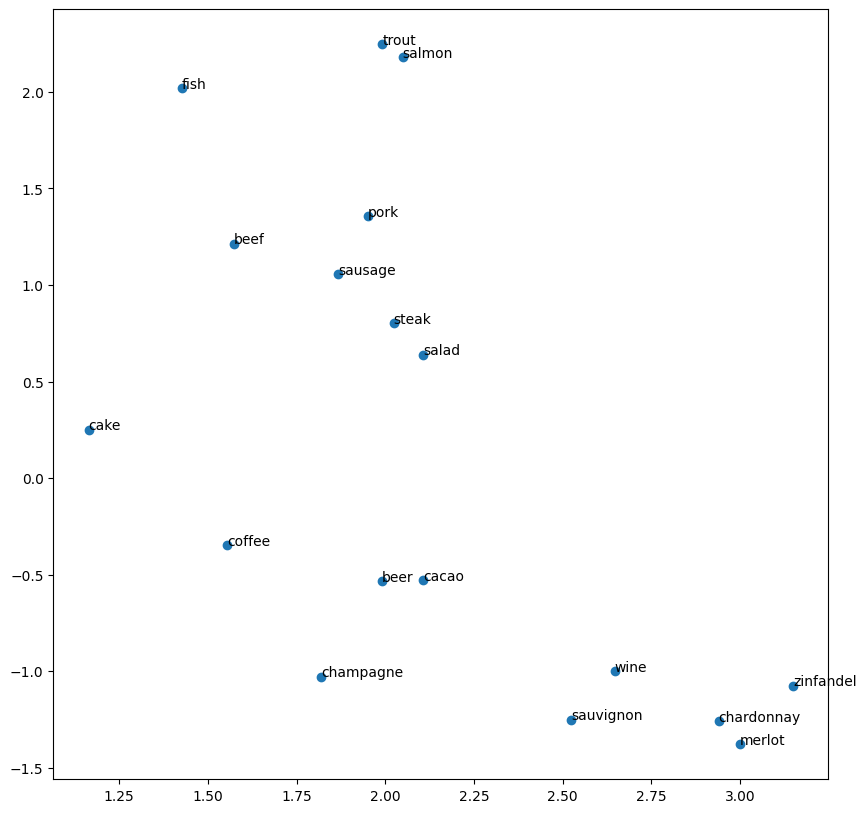

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((10, 10))
plot_vectors(pretrained_vectors, test_words, how='svd', ax=ax)

## Заключение

* Реализовали Skip Gram Negative Sampling на PyTorch
* Обучили на корпусе рецептов
    * Сходство слов модель выучила неплохо
    * Для аналогий мало данных
* Обучили SGNS с помощью библиотеки Gensim
* Загрузили веса Word2Vec, полученные с помощью большого корпуса (GoogleNews)
    * Списки похожих слов отличаются!
    * Аналогии работают